In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import os 

Stage

1. Data Collection	Gather raw data from various sources
2. Data Cleaning	Handle missing values, outliers, formatting issues
3. Feature Engineering	Create and select meaningful variables
4. Modeling	Apply machine learning algorithms
5. Evaluation	Assess model performance (accuracy, precision, etc.)
6. Deployment	Use the model in production (optional)


In [42]:
# 📦 STEP 1: IMPORT LIBRARIES
# ---------------------------
# Basic imports: OS, NumPy, Matplotlib
# TensorFlow/Keras for DL pipeline
# OpenCV and imghdr for image validation

# 🎯 Purpose: Sets up the environment and required tools


# 📁 STEP 2: DEFINE DATASET PATH
# ------------------------------
# Define the directory where the image dataset is stored

# 🎯 Purpose: Centralize data location so all functions work on it


# 🧼 STEP 3: REMOVE CORRUPTED/UNSUPPORTED IMAGES
# ---------------------------------------------
# Loop through dataset directories
# Use cv2 to check image readability
# Use imghdr to validate image type (jpeg, png)
# Remove files that don't meet expected criteria

# 🎯 Purpose: Clean raw dataset — prevent model from crashing due to bad files


# ⚙️ STEP 4: SET PARAMETERS
# -------------------------
# Set values like:
# - image size (width/height)
# - batch size
# - valid image extensions

# 🎯 Purpose: Standardize input size and control memory/batch loading


# 📷 STEP 5: LOAD IMAGE DATASET USING KERAS UTILITY
# -------------------------------------------------
# Use tf.keras.utils.image_dataset_from_directory to load images
# Split into training and validation datasets
# Enable shuffling and batching

# 🎯 Purpose: Efficiently create image datasets compatible with model training


# 👁️ STEP 6: VISUALIZE SAMPLE IMAGES
# ----------------------------------
# Use matplotlib to show some sample images from the dataset
# Plot with class names

# 🎯 Purpose: Visually inspect the loaded dataset for correctness


# 📊 STEP 7: DATA PIPELINE OPTIMIZATION (OPTIONAL)
# ------------------------------------------------
# Use `prefetch` to optimize pipeline performance (caching, preloading)

# 🎯 Purpose: Improve training speed by parallelizing loading and preprocessing


In [3]:
!pip list

Package                   Version
------------------------- -----------------
absl-py                   2.1.0
annotated-types           0.7.0
anyio                     4.4.0
argon2-cffi               25.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
astunparse                1.6.3
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
certifi                   2024.6.2
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.2
cycler                    0.12.1
debugpy                   1.8.14
decorator                 5.2.1
defusedxml                0.7.1
dnspython                 2.6.1
email_validator           2.1.1
executing                 2.2.0
fastapi                   0.111.0
fastapi-cli  

1. This block is used to prevent Out Of Memory (OOM) errors when using NVIDIA GPUs with TensorFlow.
It tells TensorFlow to only allocate GPU memory as needed (instead of reserving all memory at once).

1.1 Note  This only applies if you have a compatible NVIDIA GPU and CUDA/cuDNN set up properly.
If you're running TensorFlow on CPU (like in most laptops or older systems), this is not needed.

2. import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [4]:
# Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[]


In [6]:
# MY LAPTOP don't have gpu but have CPU
gpus = tf.config.experimental.list_physical_devices('CPU')
print(gpus)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [7]:
# step 2 now  we are going to remove dodgy images

In [14]:
# step 2 now  we are going to remove dodgy images
import cv2
import imghdr


data_dir = "data" # path of our data dircorty


In [15]:
# going to assign which extention 
image_exts = ['jpg','jpeg','bmp','png']
image_exts

['jpg', 'jpeg', 'bmp', 'png']

In [16]:
image_exts[2]

'bmp'

In [ ]:
# now useing os give me total folder but if want to know which happy and sad then look below
os.listdir(data_dir)

['happy', 'sad']

In [ ]:
# now we are going to take every happy or sad through assing path and jion funtion 
os.listdir(os.path.join(data_dir,'happy'))
# it will give me all the happy image

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1024x707.jpg',
 'ge

In [ ]:
# Loop through each class folder in the dataset directory
for image_class in os.listdir(data_dir):
    
    class_path = os.path.join(data_dir, image_class)
    
    # Loop through each image in the current class folder
    for image_name in os.listdir(class_path):
        try:
            image_path = os.path.join(class_path, image_name)  # ✅ Full path
            
            # Read the image using OpenCV (check if the image is readable)
            img = cv2.imread(image_path)
            
            # Check actual file type of the image
            tip = imghdr.what(image_path)
            
            # If image type is not in allowed list
            if tip not in image_exts:
                print('🚫 Invalid extension:', image_path)
                os.remove(image_path)
        
        except Exception as e:
            print('Issue with image {}: {}'.format(image_path, e))


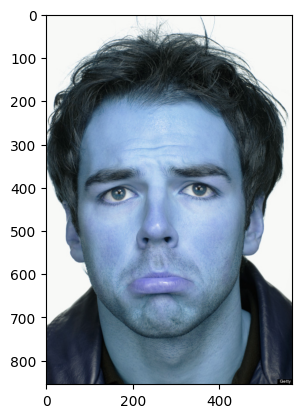

In [ ]:
plt.imshow(img) # not coloured

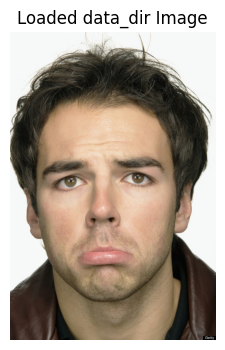

In [40]:
from matplotlib import pyplot as plt
# Load image using cv2 and convert BGR to RGB
fig = plt.figure(figsize=(12,4))
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.title("Loaded data_dir Image")
plt.show()

In [41]:
import numpy as np 
import matplotlib.pyplot as plt

In [43]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [ ]:
data=tf.keras.utils.image_dataset_from_directory('data') # loading

Found 171 files belonging to 2 classes.


In [ ]:
data[3] # does work index after gebterator keris

TypeError: '_PrefetchDataset' object is not subscriptable

In [49]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000019FA6E5B980>)

In [50]:
batch = data_iterator.next()
batch

(array([[[[2.10798492e+02, 2.28542633e+02, 2.40030914e+02],
          [2.44508972e+02, 2.46430847e+02, 2.49633972e+02],
          [2.55000000e+02, 2.53000000e+02, 2.39710266e+02],
          ...,
          [1.01462891e+02, 8.74628906e+01, 8.74628906e+01],
          [9.22330017e+01, 8.02330017e+01, 8.42330017e+01],
          [8.84531250e+01, 7.64531250e+01, 8.04531250e+01]],
 
         [[2.35688293e+02, 2.41055481e+02, 2.47553528e+02],
          [2.42543182e+02, 2.45672729e+02, 2.52934021e+02],
          [2.49475616e+02, 2.52625061e+02, 2.45932587e+02],
          ...,
          [9.92656250e+01, 8.51571960e+01, 8.54824829e+01],
          [9.45351562e+01, 8.13105469e+01, 8.49023438e+01],
          [8.91757812e+01, 7.59511719e+01, 7.95429688e+01]],
 
         [[2.31993134e+02, 2.33932922e+02, 2.40793915e+02],
          [2.22138550e+02, 2.35003784e+02, 2.52353394e+02],
          [2.31650116e+02, 2.50452850e+02, 2.54720703e+02],
          ...,
          [1.02289337e+02, 8.72893372e+01, 9.0289

In [51]:
len(batch) # two path

2

In [53]:
# now we can use index
batch[1]

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [55]:
batch[0].shape

(32, 256, 256, 3)

In [73]:
class_names = data.class_names


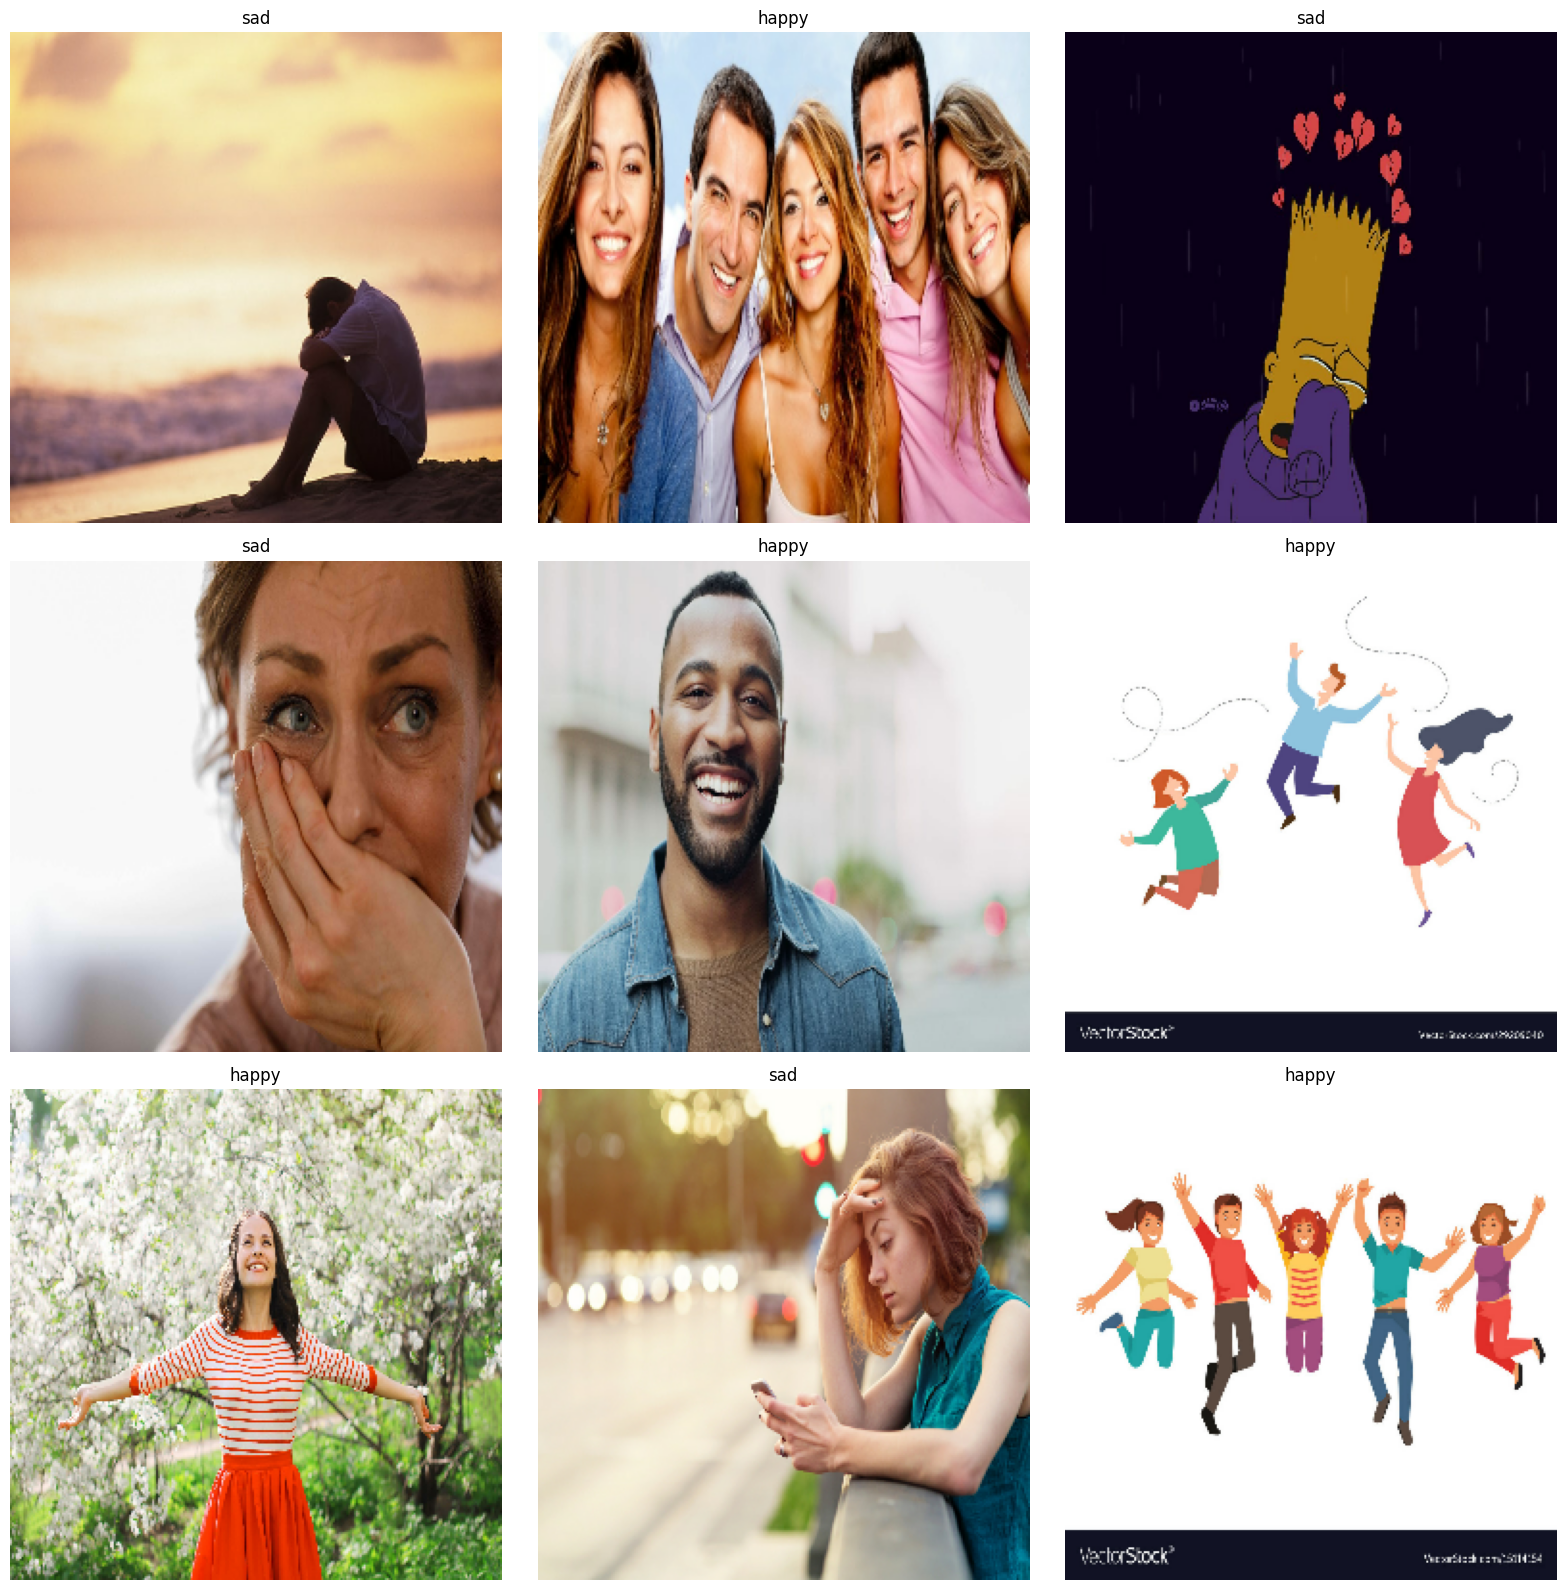

In [74]:
# Now we are going to set the image size for better visualization
plt.figure(figsize=(16, 16))  # Set the overall figure size for 9 images

# Take one batch from the dataset
for image_batch, label_batch in data.take(1):
    
    # Loop through the first 9 images in the batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)  # Create a 3x3 grid
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # Convert tensor to uint8 for display
        plt.title(class_names[label_batch[i]])  # Show class name as title
        plt.axis("off")  # Hide axis ticks

plt.tight_layout()
plt.show()
